In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import pickle
from keras.models import load_model

In [2]:
df = pd.read_csv('avg_by_game')

In [26]:
stats = pd.read_excel('C:\\Users\\Daniel\\Documents\\Flatiron\\Capstone\\sports_predictions\\stats.xlsx')

In [3]:
df.head()

,GameID,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,...,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas),Season
0,2011-12-25 00:00:00 Boston @ New York,106.0,104.0,0.534,0.459,22.2,63.9,48.6,9.7,15.5,...,7.5,9.3,16.7,111.6,113.7,1,0.0,2,4.5,2011
1,2011-12-25 00:00:00 Chicago @ Lakers,87.0,88.0,0.500,0.263,32.4,65.2,61.1,6.8,10.8,...,15.9,6.7,12.8,100.0,98.9,1,1.0,-1,-5.0,2011
2,2011-12-25 00:00:00 Clippers @ Golden State,86.0,105.0,0.421,0.293,36.2,70.5,53.1,4.4,13.8,...,10.0,13.1,9.3,116.3,95.3,1,1.0,-19,-4.5,2011
3,2011-12-25 00:00:00 Miami @ Dallas,94.0,105.0,0.433,0.366,18.2,60.5,74.2,10.1,0.0,...,9.1,11.1,19.0,105.7,94.7,1,1.0,-11,-4.5,2011
4,2011-12-25 00:00:00 Orlando @ Oklahoma City,97.0,89.0,0.542,0.361,18.4,72.0,61.8,8.6,9.4,...,7.6,7.5,16.3,96.2,104.8,1,0.0,8,7.5,2011


In [4]:
data = df.set_index(df['GameID'], drop=True)
data.drop(columns='GameID', inplace=True)

In [5]:
data

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas),Season
GameID,,,,,,,,,,,,,,,,,,,,,
2011-12-25 00:00:00 Boston @ New York,106.000000,104.000000,0.534000,0.459000,22.200000,63.900000,48.600000,9.700000,15.500000,15.200000,...,7.500000,9.300000,16.700000,111.600000,113.700000,1,0.000000,2,4.5,2011
2011-12-25 00:00:00 Chicago @ Lakers,87.000000,88.000000,0.500000,0.263000,32.400000,65.200000,61.100000,6.800000,10.800000,16.700000,...,15.900000,6.700000,12.800000,100.000000,98.900000,1,1.000000,-1,-5.0,2011
2011-12-25 00:00:00 Clippers @ Golden State,86.000000,105.000000,0.421000,0.293000,36.200000,70.500000,53.100000,4.400000,13.800000,14.700000,...,10.000000,13.100000,9.300000,116.300000,95.300000,1,1.000000,-19,-4.5,2011
2011-12-25 00:00:00 Miami @ Dallas,94.000000,105.000000,0.433000,0.366000,18.200000,60.500000,74.200000,10.100000,0.000000,15.200000,...,9.100000,11.100000,19.000000,105.700000,94.700000,1,1.000000,-11,-4.5,2011
2011-12-25 00:00:00 Orlando @ Oklahoma City,97.000000,89.000000,0.542000,0.361000,18.400000,72.000000,61.800000,8.600000,9.400000,16.100000,...,7.600000,7.500000,16.300000,96.200000,104.800000,1,0.000000,8,7.5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18 00:00:00 Washington @ Boston,114.189189,110.783784,0.552216,0.243108,25.018919,79.172973,58.581081,8.381081,9.870270,12.651351,...,7.143243,7.621622,12.310811,109.908108,113.859459,37,0.405405,18,2.0,2020
2021-05-19 00:00:00 Golden State @ Lakers,111.216216,107.702703,0.537865,0.295243,22.859459,81.416216,61.097297,8.078378,10.275676,13.575676,...,8.121622,9.078378,13.235135,107.913514,110.851351,37,0.378378,3,5.5,2020
2021-05-19 00:00:00 San Antonio @ Memphis,109.756757,110.216216,0.510108,0.229595,24.378378,79.027027,63.818919,8.856757,9.964865,10.843243,...,7.110811,8.721622,9.451351,111.759459,112.091892,37,0.513514,4,4.5,2020


In [6]:
y = data['Home Win By']
x = data.drop(columns='Home Win By')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
nn_model = models.Sequential()

In [8]:
nn_model.add(Dense(500, input_dim=30, activation= 'relu'))
nn_model.add(Dense(250, activation= 'relu'))
nn_model.add(Dense(125, activation= 'relu'))

nn_model.add(Dense(1, activation='linear'))

In [9]:
nn_model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])

In [10]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_mean_squared_error', mode='min', verbose=1, save_best_only=True)

In [11]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               15500     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 126       
Total params: 172,251
Trainable params: 172,251
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = nn_model.fit(x_train, y_train, epochs=200, verbose=2, batch_size=300, validation_data=(x_test, y_test), callbacks=[es, mc])

Epoch 1/200
27/27 - 1s - loss: 4006.0134 - mean_squared_error: 4006.0134 - val_loss: 569.8730 - val_mean_squared_error: 569.8730

Epoch 00001: val_mean_squared_error improved from inf to 569.87305, saving model to best_model.h5
Epoch 2/200
27/27 - 0s - loss: 279.5822 - mean_squared_error: 279.5822 - val_loss: 224.7988 - val_mean_squared_error: 224.7988

Epoch 00002: val_mean_squared_error improved from 569.87305 to 224.79875, saving model to best_model.h5
Epoch 3/200
27/27 - 0s - loss: 192.2135 - mean_squared_error: 192.2135 - val_loss: 190.4896 - val_mean_squared_error: 190.4896

Epoch 00003: val_mean_squared_error improved from 224.79875 to 190.48961, saving model to best_model.h5
Epoch 4/200
27/27 - 0s - loss: 184.0396 - mean_squared_error: 184.0396 - val_loss: 185.9176 - val_mean_squared_error: 185.9176

Epoch 00004: val_mean_squared_error improved from 190.48961 to 185.91757, saving model to best_model.h5
Epoch 5/200
27/27 - 0s - loss: 178.2004 - mean_squared_error: 178.2004 - val

27/27 - 0s - loss: 153.3789 - mean_squared_error: 153.3789 - val_loss: 172.1078 - val_mean_squared_error: 172.1078

Epoch 00039: val_mean_squared_error did not improve from 144.62523
Epoch 40/200
27/27 - 0s - loss: 156.0091 - mean_squared_error: 156.0091 - val_loss: 161.4813 - val_mean_squared_error: 161.4813

Epoch 00040: val_mean_squared_error did not improve from 144.62523
Epoch 41/200
27/27 - 0s - loss: 157.5114 - mean_squared_error: 157.5114 - val_loss: 155.6151 - val_mean_squared_error: 155.6151

Epoch 00041: val_mean_squared_error did not improve from 144.62523
Epoch 42/200
27/27 - 0s - loss: 143.5541 - mean_squared_error: 143.5541 - val_loss: 143.3103 - val_mean_squared_error: 143.3103

Epoch 00042: val_mean_squared_error improved from 144.62523 to 143.31035, saving model to best_model.h5
Epoch 43/200
27/27 - 0s - loss: 145.9654 - mean_squared_error: 145.9654 - val_loss: 144.1105 - val_mean_squared_error: 144.1105

Epoch 00043: val_mean_squared_error did not improve from 143.31


Epoch 00079: val_mean_squared_error did not improve from 135.39180
Epoch 80/200
27/27 - 0s - loss: 139.9978 - mean_squared_error: 139.9978 - val_loss: 157.3097 - val_mean_squared_error: 157.3097

Epoch 00080: val_mean_squared_error did not improve from 135.39180
Epoch 81/200
27/27 - 0s - loss: 142.1204 - mean_squared_error: 142.1204 - val_loss: 136.0697 - val_mean_squared_error: 136.0697

Epoch 00081: val_mean_squared_error did not improve from 135.39180
Epoch 82/200
27/27 - 0s - loss: 137.9083 - mean_squared_error: 137.9083 - val_loss: 135.1680 - val_mean_squared_error: 135.1680

Epoch 00082: val_mean_squared_error improved from 135.39180 to 135.16800, saving model to best_model.h5
Epoch 83/200
27/27 - 0s - loss: 132.6147 - mean_squared_error: 132.6147 - val_loss: 135.9954 - val_mean_squared_error: 135.9954

Epoch 00083: val_mean_squared_error did not improve from 135.16800
Epoch 84/200
27/27 - 0s - loss: 131.6253 - mean_squared_error: 131.6253 - val_loss: 142.3998 - val_mean_squared


Epoch 00119: val_mean_squared_error did not improve from 131.99554
Epoch 120/200
27/27 - 0s - loss: 141.4947 - mean_squared_error: 141.4947 - val_loss: 142.7263 - val_mean_squared_error: 142.7263

Epoch 00120: val_mean_squared_error did not improve from 131.99554
Epoch 121/200
27/27 - 0s - loss: 133.6933 - mean_squared_error: 133.6933 - val_loss: 132.6895 - val_mean_squared_error: 132.6895

Epoch 00121: val_mean_squared_error did not improve from 131.99554
Epoch 122/200
27/27 - 0s - loss: 131.6435 - mean_squared_error: 131.6435 - val_loss: 132.1042 - val_mean_squared_error: 132.1042

Epoch 00122: val_mean_squared_error did not improve from 131.99554
Epoch 123/200
27/27 - 0s - loss: 135.2505 - mean_squared_error: 135.2505 - val_loss: 138.9992 - val_mean_squared_error: 138.9992

Epoch 00123: val_mean_squared_error did not improve from 131.99554
Epoch 124/200
27/27 - 0s - loss: 139.1106 - mean_squared_error: 139.1106 - val_loss: 143.5744 - val_mean_squared_error: 143.5744

Epoch 00124: v


Epoch 00160: val_mean_squared_error did not improve from 130.90508
Epoch 161/200
27/27 - 0s - loss: 128.7807 - mean_squared_error: 128.7807 - val_loss: 133.3508 - val_mean_squared_error: 133.3508

Epoch 00161: val_mean_squared_error did not improve from 130.90508
Epoch 162/200
27/27 - 0s - loss: 141.0732 - mean_squared_error: 141.0732 - val_loss: 136.7236 - val_mean_squared_error: 136.7236

Epoch 00162: val_mean_squared_error did not improve from 130.90508
Epoch 163/200
27/27 - 0s - loss: 133.1510 - mean_squared_error: 133.1510 - val_loss: 136.5074 - val_mean_squared_error: 136.5074

Epoch 00163: val_mean_squared_error did not improve from 130.90508
Epoch 164/200
27/27 - 0s - loss: 130.5330 - mean_squared_error: 130.5330 - val_loss: 141.2687 - val_mean_squared_error: 141.2687

Epoch 00164: val_mean_squared_error did not improve from 130.90508
Epoch 165/200
27/27 - 0s - loss: 129.6889 - mean_squared_error: 129.6889 - val_loss: 131.5514 - val_mean_squared_error: 131.5514

Epoch 00165: v

In [15]:
saved_model = load_model('best_model.h5')

<ipython-input-16-e4f85823ae43>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


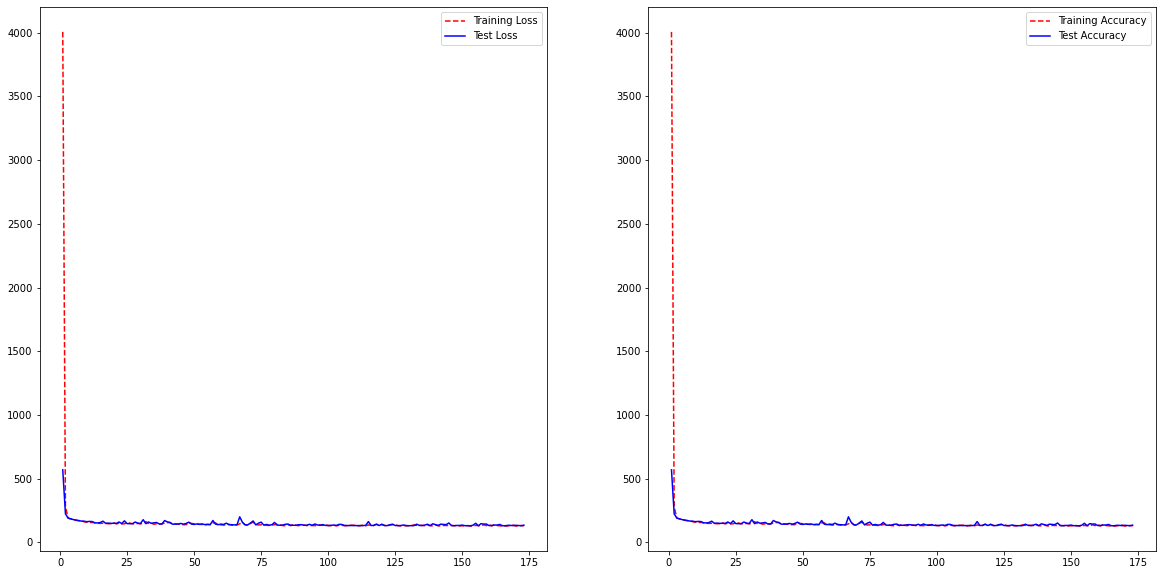

In [16]:
# Get training and test loss/accuracy histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['mean_squared_error']
test_acc = history.history['val_mean_squared_error']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])

# Visualize accuracy  history
ax2.plot(epoch_count, training_acc, 'r--')
ax2.plot(epoch_count, test_acc, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])

fig.show();

In [17]:
train_preds = saved_model.predict(x_train)
test_preds = saved_model.predict(x_test)

In [18]:
print('Training RMSE for neural networks baseline model: {}'.format(mean_squared_error(y_train, train_preds)**0.5))
print('Testing RMSE for neural networks baseline model: {}'.format(mean_squared_error(y_test, test_preds)**0.5))

Training RMSE for neural networks baseline model: 11.271531656668156
Testing RMSE for neural networks baseline model: 11.441375237591696


In [19]:
def beat_vegas(result, vegas, prediction):
    tie = 0
    games = 0
    wins = 0
    win_total = 0
    loss = 0
    loss_total = 0
    
    for i in range(len(result)):
        if ((result[i]>vegas[i]) & (prediction[i]>vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif ((result[i]<vegas[i]) & (prediction[i]<vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif (result[i]==vegas[i]):
            tie += 1
            
        else:
            loss += 1
            games += 1
            loss_total += abs(vegas[i]-prediction[i])
            
    win_rate = (wins/games)*100
    win_distance = win_total/wins
    loss_distance = loss_total/loss
    
    print('Beat Vegas {}% of the time'.format(win_rate))
    print('Vegas RMSE: {}'.format(mean_squared_error(result, vegas)**0.5))
    print('Our RMSE: {}'.format(mean_squared_error(result, prediction)**0.5))
    print('When we beat Vegas, our prediction is {} points away from the Vegas spread.'.format(win_distance))
    print('When we lose to Vegas, our prediction is {} points away from the Vegas spread.'.format(loss_distance))

In [20]:
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], test_preds)

Beat Vegas 63.41647770219198% of the time
Vegas RMSE: 12.41746477088067
Our RMSE: 11.441375237591696
When we beat Vegas, our prediction is [3.1332655] points away from the Vegas spread.
When we lose to Vegas, our prediction is [1.9699143] points away from the Vegas spread.


In [21]:
# nn_file = 'nn_model.sav'
# pickle.dump(saved_model, open(nn_file, 'wb'))

TypeError: cannot pickle 'weakref' object

In [27]:
saved_model.predict(stats)

array([[-5.46404  ],
       [ 3.8087814],
       [ 4.31838  ]], dtype=float32)

In [ ]:
preds =  pd.DataFrame(test_preds, index=x_test.index)

In [ ]:
preds.columns=['NN Predictions']

In [ ]:
train_preds =  pd.DataFrame(train_preds, index=x_train.index)
train_preds.columns=['NN Training Prediction']

In [ ]:
# preds.to_csv('NN Preds')
train_preds.to_csv('NN Train Prediction')